<a href="https://colab.research.google.com/github/MattLudu/Challeng_TelecomX_Latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**📌 Extracción**

In [499]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [501]:
telecom_X = pd.read_json(url)

In [502]:
telecom_X.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#**🔧 Transformación**

##✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [503]:
telecom_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [504]:
telecom_X.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [505]:
telecom_X.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


###**Diccionario de datos**


**customerID:** número de identificación único de cada cliente

**Churn:** si el cliente dejó o no la empresa

**gender:** género (masculino y femenino)

**SeniorCitizen:** información sobre si un cliente tiene o no una edad igual o mayor a 65 años

**Partner:** si el cliente tiene o no una pareja

**Dependents:** si el cliente tiene o no dependientes

**tenure:** meses de contrato del cliente

**PhoneService:** suscripción al servicio telefónico

**MultipleLines:** suscripción a más de una línea telefónica

**InternetService:** suscripción a un proveedor de internet

**OnlineSecurity:** suscripción adicional de seguridad en línea

**OnlineBackup:** suscripción adicional de respaldo en línea

**DeviceProtection:** suscripción adicional de protección del dispositivo

**TechSupport:** suscripción adicional de soporte técnico, menor tiempo de espera

**StreamingTV:** suscripción de televisión por cable

**StreamingMovies:** suscripción de streaming de películas

**Contract:** tipo de contrato

**PaperlessBilling:** si el cliente prefiere recibir la factura en línea

**PaymentMethod:** forma de pago

**Charges.Monthly:** total de todos los servicios del cliente por mes

**Charges.Total:** total gastado por el cliente

###Normalizar columnas

#### customer de Telecom X
#### Renombra columnas, convierte a tipo string y pasa a minúsculas

In [506]:
telecom_X_customer = pd.json_normalize(telecom_X['customer'])
telecom_X_customer.rename(columns={"gender": "customer_gender", "SeniorCitizen": "customer_SeniorCitizen",
                          "Partner":"customer_Partner","Dependents":"customer_Dependents",
                          "tenure":"customer_tenure"}, inplace=True)
telecom_X_customer["customer_gender"] = telecom_X_customer["customer_gender"].astype("string")
telecom_X_customer["customer_Partner"] = (telecom_X_customer["customer_Partner"].astype(object).str.strip().str.lower()
    .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))
telecom_X_customer["customer_Dependents"] = (telecom_X_customer["customer_Dependents"].astype(object).str.strip().str.lower()
    .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))

telecom_X_customer['customer_gender'] = telecom_X_customer['customer_gender'].str.lower()

telecom_X_customer.head()

/tmp/ipython-input-3350011967.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))
/tmp/ipython-input-3350011967.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))


,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,female,0,1,1,9
1,male,0,0,0,9
2,male,0,0,0,4
3,male,1,1,0,13
4,female,1,1,0,3


In [507]:
telecom_X_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_gender         7267 non-null   string
 1   customer_SeniorCitizen  7267 non-null   int64 
 2   customer_Partner        7267 non-null   int64 
 3   customer_Dependents     7267 non-null   int64 
 4   customer_tenure         7267 non-null   int64 
dtypes: int64(4), string(1)
memory usage: 284.0 KB


####phone de Telecom X
#### Renombra columnas, convierte a tipo string y pasa a minúsculas

In [508]:
telecom_X_phone = pd.json_normalize(telecom_X['phone'])
telecom_X_phone.rename(columns={"PhoneService": "phone_PhoneService", "MultipleLines": "phone_MultipleLines"}, inplace=True)

telecom_X_phone["phone_PhoneService"] = (telecom_X_phone["phone_PhoneService"].astype(object).str.strip().str.lower()
    .replace({'yes': 1, 'no': 0, 'no phone service': 0}).astype(np.int64))
telecom_X_phone["phone_MultipleLines"] = (telecom_X_phone["phone_MultipleLines"].astype(object).str.strip().str.lower()
    .replace({'yes': 1, 'no': 0, 'no phone service': 0}).astype(np.int64))

telecom_X_phone.head()

/tmp/ipython-input-2133981802.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0, 'no phone service': 0}).astype(np.int64))
/tmp/ipython-input-2133981802.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0, 'no phone service': 0}).astype(np.int64))


,phone_PhoneService,phone_MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [509]:
telecom_X_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   phone_PhoneService   7267 non-null   int64
 1   phone_MultipleLines  7267 non-null   int64
dtypes: int64(2)
memory usage: 113.7 KB


####internet de Telecom X
#### Renombra columnas, convierte a tipo string y pasa a minúsculas

In [510]:
telecom_X_internet = pd.json_normalize(telecom_X['internet'])

telecom_X_internet.rename(columns={"InternetService": "internet_InternetService", "OnlineSecurity": "internet_OnlineSecurity",
                          "OnlineBackup":"internet_OnlineBackup","DeviceProtection":"internet_DeviceProtection",
                          "TechSupport":"internet_TechSupport","StreamingTV":"internet_StreamingTV",
                          "StreamingMovies":"internet_StreamingMovies"}, inplace=True)

telecom_X_internet["internet_InternetService"] = telecom_X_internet["internet_InternetService"].astype("string")
telecom_X_internet["internet_OnlineSecurity"] = telecom_X_internet["internet_OnlineSecurity"].astype("string")
telecom_X_internet["internet_OnlineBackup"] = telecom_X_internet["internet_OnlineBackup"].astype("string")
telecom_X_internet["internet_DeviceProtection"] = telecom_X_internet["internet_DeviceProtection"].astype("string")
telecom_X_internet["internet_TechSupport"] = telecom_X_internet["internet_TechSupport"].astype("string")
telecom_X_internet["internet_StreamingTV"] = telecom_X_internet["internet_StreamingTV"].astype("string")
telecom_X_internet["internet_StreamingMovies"] = telecom_X_internet["internet_StreamingMovies"].astype("string")
cols = ["internet_InternetService","internet_OnlineSecurity","internet_OnlineBackup","internet_DeviceProtection",
        "internet_TechSupport","internet_StreamingTV","internet_StreamingMovies"]
for c in cols:
    telecom_X_internet[c] = telecom_X_internet[c].str.lower()

telecom_X_internet.head()

,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,dsl,no,yes,no,yes,yes,no
1,dsl,no,no,no,no,no,yes
2,fiber optic,no,no,yes,no,no,no
3,fiber optic,no,yes,yes,no,yes,yes
4,fiber optic,no,no,no,yes,yes,no


####account de Telecom X
#### Renombra columnas, convierte a tipo string y pasa a minúsculas

In [511]:
telecom_X_account = pd.json_normalize(telecom_X['account'])

telecom_X_account.rename(columns={"Contract": "account_Contract", "PaperlessBilling": "account_PaperlessBilling",
                          "PaymentMethod":"account_PaymentMethod","Charges.Monthly":"account_Charges_Monthly",
                          "Charges.Total":"account_Charges_Total"}, inplace=True)

telecom_X_account["account_Contract"] = telecom_X_account["account_Contract"].astype("string")
telecom_X_account["account_PaperlessBilling"] = (telecom_X_account["account_PaperlessBilling"].astype(object).str.strip().str.lower()
    .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))
telecom_X_account["account_PaymentMethod"] = telecom_X_account["account_PaymentMethod"].astype("string")

cols = ["account_Contract","account_PaymentMethod"]
for c in cols:
    telecom_X_account[c] = telecom_X_account[c].str.lower()

telecom_X_account.head()

/tmp/ipython-input-2214259345.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))


,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,one year,1,mailed check,65.6,593.3
1,month-to-month,0,mailed check,59.9,542.4
2,month-to-month,1,electronic check,73.9,280.85
3,month-to-month,1,electronic check,98.0,1237.85
4,month-to-month,1,mailed check,83.9,267.4


In [512]:
telecom_X_account['account_Charges_Total'] = telecom_X_account['account_Charges_Total'].astype(str)
telecom_X_account['account_Charges_Total'] = telecom_X_account['account_Charges_Total']\
    .str.replace('$', '', regex=False)\
    .str.replace(',', '', regex=False)\
    .str.strip()
telecom_X_account['account_Charges_Total'] = telecom_X_account['account_Charges_Total'].replace('', '0')
telecom_X_account['account_Charges_Total'] = telecom_X_account['account_Charges_Total'].astype(np.float64)

In [513]:
telecom_X_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_Contract          7267 non-null   string 
 1   account_PaperlessBilling  7267 non-null   int64  
 2   account_PaymentMethod     7267 non-null   string 
 3   account_Charges_Monthly   7267 non-null   float64
 4   account_Charges_Total     7267 non-null   float64
dtypes: float64(2), int64(1), string(2)
memory usage: 284.0 KB


#### Unificación de DataFrame

In [514]:
datos_telecom_x = pd.concat([telecom_X, telecom_X_customer, telecom_X_phone, telecom_X_internet, telecom_X_account], axis=1)

In [515]:
datos_telecom_x.head()

,customerID,Churn,customer,phone,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",female,0,1,1,...,yes,no,yes,yes,no,one year,1,mailed check,65.6,593.30
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",male,0,0,0,...,no,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",male,0,0,0,...,no,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",male,1,1,0,...,yes,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",female,1,1,0,...,no,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40


In [516]:
datos_telecom_x = datos_telecom_x.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [517]:
datos_telecom_x['Churn'] = (datos_telecom_x['Churn'].astype(object).str.strip().str.lower()
    .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))

datos_telecom_x['Churn'].dtype, datos_telecom_x['Churn'].sample(10)


/tmp/ipython-input-2211439433.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0, '': 0}).astype(np.int64))


(dtype('int64'),
 5825    1
 2622    0
 5288    1
 4859    0
 6565    0
 1589    0
 6243    0
 6484    0
 4255    0
 5657    0
 Name: Churn, dtype: int64)

In [518]:
print(datos_telecom_x.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')


### Renombrando columnas para mejorar la comprensión y analizando inconsistencias


In [519]:
datos_telecom_x.rename(columns={
    'customerID': 'ID',
    'Churn': 'abandono',
    'customer_gender': 'cliente_genero',
    'customer_SeniorCitizen': 'cliente_mayor_edad',
    'customer_Partner': 'cliente_tiene_pareja',
    'customer_Dependents': 'cliente_dependientes',
    'customer_tenure': 'cliente_antiguedad',
    'phone_PhoneService': 'telefono_servicio',
    'phone_MultipleLines': 'telefono_lineas_adicionales',
    'internet_InternetService': 'internet_servicio',
    'internet_OnlineSecurity': 'internet_seguridad',
    'internet_OnlineBackup': 'internet_respaldo',
    'internet_DeviceProtection': 'internet_proteccion_dispositivo',
    'internet_TechSupport': 'internet_soporte_tecnico',
    'internet_StreamingTV': 'internet_tv',
    'internet_StreamingMovies': 'internet_peliculas',
    'account_Contract': 'cuenta_contrato',
    'account_PaperlessBilling': 'cuenta_sin_papel',
    'account_PaymentMethod': 'cuenta_metodo_pago',
    'account_Charges_Monthly': 'cuenta_cargo_mensual',
    'account_Charges_Total': 'cuenta_cargo_total'
}, inplace=True)

In [520]:
datos_telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   object 
 1   abandono                         7267 non-null   int64  
 2   cliente_genero                   7267 non-null   string 
 3   cliente_mayor_edad               7267 non-null   int64  
 4   cliente_tiene_pareja             7267 non-null   int64  
 5   cliente_dependientes             7267 non-null   int64  
 6   cliente_antiguedad               7267 non-null   int64  
 7   telefono_servicio                7267 non-null   int64  
 8   telefono_lineas_adicionales      7267 non-null   int64  
 9   internet_servicio                7267 non-null   string 
 10  internet_seguridad               7267 non-null   string 
 11  internet_respaldo                7267 non-null   string 
 12  internet_proteccion_

In [521]:
datos_telecom_x.sample(5)

,ID,abandono,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total
4353,5975-BAICR,0,male,0,1,1,36,1,0,dsl,...,no,yes,no,no,yes,one year,1,credit card (automatic),63.70,2188.5
6192,8495-LJDFO,0,female,1,0,0,64,1,1,fiber optic,...,no,yes,yes,yes,yes,month-to-month,1,bank transfer (automatic),108.95,7111.3
2640,3677-TNKIO,1,female,0,0,0,14,1,0,fiber optic,...,no,no,no,no,no,month-to-month,1,credit card (automatic),71.00,914.0
5190,7083-YNSKY,1,female,0,0,0,15,1,1,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,1,credit card (automatic),25.40,399.6
5665,7740-BTPUX,0,male,1,1,0,55,1,1,fiber optic,...,yes,yes,yes,yes,yes,two year,1,electronic check,113.60,6292.7


####Revisar tipos de datos y valores nulos

In [522]:
datos_telecom_x.isnull().sum()

,0
ID,0
abandono,0
cliente_genero,0
cliente_mayor_edad,0
cliente_tiene_pareja,0
cliente_dependientes,0
cliente_antiguedad,0
telefono_servicio,0
telefono_lineas_adicionales,0
internet_servicio,0


####Revisar valores duplicados

In [530]:
duplicados = datos_telecom_x.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

Filas duplicadas: 0


####Revisar inconsistencias en categorías de texto

In [529]:
cols_texto = datos_telecom_x.select_dtypes(include="string").columns

for c in cols_texto:
    print(f"{c}: {datos_telecom_x[c].unique()}")

cliente_genero: <StringArray>
['female', 'male']
Length: 2, dtype: string
internet_servicio: <StringArray>
['dsl', 'fiber optic', 'no']
Length: 3, dtype: string
internet_seguridad: <StringArray>
['no', 'yes', 'no internet service']
Length: 3, dtype: string
internet_respaldo: <StringArray>
['yes', 'no', 'no internet service']
Length: 3, dtype: string
internet_proteccion_dispositivo: <StringArray>
['no', 'yes', 'no internet service']
Length: 3, dtype: string
internet_soporte_tecnico: <StringArray>
['yes', 'no', 'no internet service']
Length: 3, dtype: string
internet_tv: <StringArray>
['yes', 'no', 'no internet service']
Length: 3, dtype: string
internet_peliculas: <StringArray>
['no', 'yes', 'no internet service']
Length: 3, dtype: string
cuenta_contrato: <StringArray>
['one year', 'month-to-month', 'two year']
Length: 3, dtype: string
cuenta_metodo_pago: <StringArray>
[             'mailed check',          'electronic check',
   'credit card (automatic)', 'bank transfer (automatic)']
L

####Revisar rangos y valores numéricos

In [525]:
datos_telecom_x.describe()

,abandono,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,cuenta_sin_papel,cuenta_cargo_mensual,cuenta_cargo_total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.593230,64.720098,2277.182035
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.491265,30.129572,2268.648587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.425000,396.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.300000,1389.200000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


#📊 Carga y análisis

###Cálculo de cuentas diarias a partir de la facturación mensual

In [526]:
datos_telecom_x['cuentas_diarias'] = datos_telecom_x['cuenta_cargo_mensual'] / 30

datos_telecom_x[['cuenta_cargo_mensual', 'cuentas_diarias']].head()

,cuenta_cargo_mensual,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [528]:
datos_telecom_x.sample(10)

,ID,abandono,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total,cuentas_diarias
830,1174-FGIFN,0,female,0,1,1,28,1,1,fiber optic,...,no,yes,no,yes,one year,1,electronic check,90.45,2509.25,3.015000
571,0817-HSUSE,0,male,0,0,0,1,1,0,dsl,...,yes,yes,yes,yes,month-to-month,1,electronic check,75.50,75.50,2.516667
2518,3518-PZXZQ,0,female,0,1,0,1,1,0,dsl,...,no,no,yes,no,month-to-month,1,mailed check,55.30,55.30,1.843333
4510,6178-KFNHS,1,female,0,0,1,12,1,1,fiber optic,...,no,no,no,no,month-to-month,1,electronic check,78.30,909.25,2.610000
2831,3927-NLNRY,1,male,0,1,0,53,1,0,fiber optic,...,no,no,yes,yes,one year,1,bank transfer (automatic),94.25,4867.95,3.141667
6242,8591-NXRCV,0,female,0,0,0,41,1,1,dsl,...,yes,yes,no,yes,month-to-month,1,bank transfer (automatic),74.65,3090.65,2.488333
2810,3896-RCYYE,0,female,0,0,0,67,0,0,dsl,...,yes,yes,yes,yes,month-to-month,1,credit card (automatic),53.40,3579.15,1.780000
7185,9881-VCZEP,0,female,0,1,0,25,1,1,dsl,...,no,no,no,no,month-to-month,0,electronic check,54.10,1373.00,1.803333
7011,9648-BCHKM,0,female,0,1,1,18,1,1,no,...,no internet service,no internet service,no internet service,no internet service,two year,1,credit card (automatic),24.65,471.35,0.821667
6669,9170-ARBTB,0,female,0,1,1,52,1,0,no,...,no internet service,no internet service,no internet service,no internet service,one year,0,credit card (automatic),19.60,1012.40,0.653333


### **Análisis Descriptivo**

#### Estadísticas descriptivas para columnas numéricas

In [532]:
columnas_numericas = datos_telecom_x.select_dtypes(include=np.number).columns


estadisticas_numericas = datos_telecom_x[columnas_numericas].describe().T
estadisticas_numericas['mediana'] = datos_telecom_x[columnas_numericas].median()
estadisticas_numericas['rango'] = estadisticas_numericas['max'] - estadisticas_numericas['min']

print(estadisticas_numericas)

                              count         mean          std        min  \
abandono                     7267.0     0.257190     0.437115   0.000000   
cliente_mayor_edad           7267.0     0.162653     0.369074   0.000000   
cliente_tiene_pareja         7267.0     0.484106     0.499782   0.000000   
cliente_dependientes         7267.0     0.300124     0.458343   0.000000   
cliente_antiguedad           7267.0    32.346498    24.571773   0.000000   
telefono_servicio            7267.0     0.902711     0.296371   0.000000   
telefono_lineas_adicionales  7267.0     0.421770     0.493876   0.000000   
cuenta_sin_papel             7267.0     0.593230     0.491265   0.000000   
cuenta_cargo_mensual         7267.0    64.720098    30.129572  18.250000   
cuenta_cargo_total           7267.0  2277.182035  2268.648587   0.000000   
cuentas_diarias              7267.0     2.157337     1.004319   0.608333   

                                    25%          50%          75%  \
abandono          

#### Estadísticas para columnas categóricas / binarias

In [535]:
columnas_categoricas = datos_telecom_x.select_dtypes(include=['object', 'string']).columns
for col in columnas_categoricas:
    print(f"\n=== Distribución de '{col}' ===")
    print(datos_telecom_x[col].value_counts(dropna=False))
    print(datos_telecom_x[col].value_counts(normalize=True, dropna=False))


=== Distribución de 'ID' ===
ID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64
ID
9995-HOTOH    0.000138
0002-ORFBO    0.000138
0003-MKNFE    0.000138
9970-QBCDA    0.000138
9968-FFVVH    0.000138
                ...   
0014-BMAQU    0.000138
0013-SMEOE    0.000138
0013-MHZWF    0.000138
0013-EXCHZ    0.000138
0011-IGKFF    0.000138
Name: proportion, Length: 7267, dtype: float64

=== Distribución de 'cliente_genero' ===
cliente_genero
male      3675
female    3592
Name: count, dtype: Int64
cliente_genero
male      0.505711
female    0.494289
Name: proportion, dtype: Float64

=== Distribución de 'internet_servicio' ===
internet_servicio
fiber optic    3198
dsl            2488
no             1581
Name: count, dtype: Int64
internet_servicio
fiber optic    0.440072
dsl             0.34237
no             0.217559
Name: prop

###Distribución de evasión

####Conteo de abandono

In [540]:
abandono_counts = datos_telecom_x['abandono'].value_counts().rename({0: 'Permanencia', 1: 'Abandono'})

#####1. Gráfico de barras

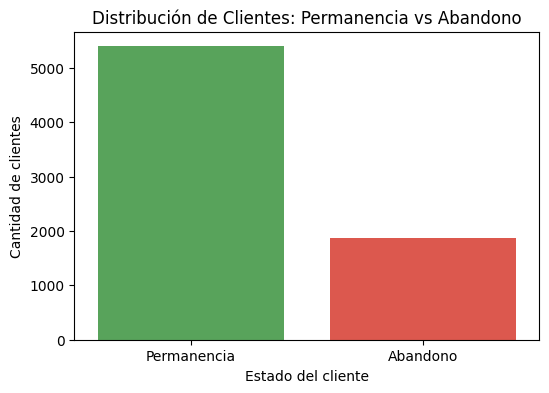

In [542]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=abandono_counts.index,
    y=abandono_counts.values,
    hue=abandono_counts.index,
    palette=['#4CAF50', '#F44336'],
    legend=False
)
plt.title("Distribución de Clientes: Permanencia vs Abandono")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Estado del cliente")
plt.show()

#####2. Gráfico circular

In [544]:
fig = px.pie(
    values=abandono_counts.values,
    names=abandono_counts.index,
    title="Proporción interactiva de clientes: Permanencia vs Abandono",
    color=abandono_counts.index,
    color_discrete_map={'Permanencia':'#4CAF50', 'Abandono':'#F44336'}
)
fig.show()

#📄Informe final